[['A4', 'A5', 'A2'], ['A4', 'A3'], ['A1', 'A2'], ['A1', 'A3']]


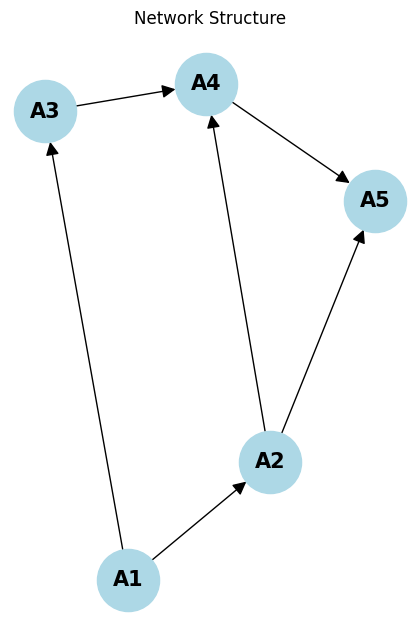

In [10]:
from pgmpy.models import MarkovNetwork
import matplotlib.pyplot as plt
import networkx as nx


model = MarkovNetwork()
model.add_nodes_from(['A1', 'A2', 'A3', 'A4', 'A5'])
model.add_edges_from([('A1', 'A2'), ('A1', 'A3'), 
                      ('A2', 'A4'), ('A2', 'A5'), 
                      ('A3', 'A4'), ('A4', 'A5')])


graph = nx.DiGraph()
graph.add_edges_from(model.edges())
plt.figure(figsize=(4, 6))
pos = nx.spring_layout(graph) 
nx.draw(graph, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightblue', font_size=15, font_weight='bold', arrowsize=20)

cliques=list(nx.find_cliques(model))
print(cliques)
plt.title('Network Structure')
plt.show()

In [19]:
import numpy as np
from itertools import product


def phi_A4_A5_A2(A4, A5, A2, i4, i5, i2):
    return np.exp(i4 * A4 + i5 * A5 + i2 * A2)

def phi_A4_A3(A4, A3, i4, i3):
    return np.exp(i4 * A4 + i3 * A3)

def phi_A1_A2(A1, A2, i1, i2):
    return np.exp(i1 * A1 + i2 * A2)

def phi_A1_A3(A1, A3, i1, i3):
    return np.exp(i1 * A1 + i3 * A3)

i1, i2, i3, i4, i5 = 1, 1, 1, 1, 1  

prob_comuna = []
for A1, A2, A3, A4, A5 in product([0, 1], repeat=5):
    potential = (phi_A4_A5_A2(A4, A5, A2, i4, i5, i2) *
                 phi_A4_A3(A4, A3, i4, i3) *
                 phi_A1_A2(A1, A2, i1, i2) *
                 phi_A1_A3(A1, A3, i1, i3))
    prob_comuna.append(potential)

prob_comuna = np.array(prob_comuna)
prob_comuna_normalizata = prob_comuna / prob_comuna.sum()

print(prob_comuna_normalizata)


[5.43006841e-05 1.47604563e-04 4.01230801e-04 1.09065840e-03
 4.01230801e-04 1.09065840e-03 2.96471690e-03 8.05893608e-03
 4.01230801e-04 1.09065840e-03 2.96471690e-03 8.05893608e-03
 2.96471690e-03 8.05893608e-03 2.19064595e-02 5.95479308e-02
 4.01230801e-04 1.09065840e-03 2.96471690e-03 8.05893608e-03
 2.96471690e-03 8.05893608e-03 2.19064595e-02 5.95479308e-02
 2.96471690e-03 8.05893608e-03 2.19064595e-02 5.95479308e-02
 2.19064595e-02 5.95479308e-02 1.61868058e-01 4.40003001e-01]


In [20]:

stare_maxima = max(prob_comuna_normalizata, key=lambda x: x[1])
print(stare_maxima)

IndexError: invalid index to scalar variable.